In [1]:
import os
import pandas as pd
df = pd.read_excel(r"C:\Users\Shanmuga Shyam. B\OneDrive\Desktop\ml-learn\dummies\dummies_learn.xlsx")
df

,town,area,price
0,trichy,2600,550000
1,trichy,3000,565000
2,trichy,3200,610000
3,chennai,3600,680000
4,chennai,4000,725000
5,chennai,2600,585000
6,madurai,2800,615000
7,madurai,3300,650000
8,madurai,3600,710000


In [11]:
dummies = pd.get_dummies(df.town)
dummies

,chennai,madurai,trichy
0,False,False,True
1,False,False,True
2,False,False,True
3,True,False,False
4,True,False,False
5,True,False,False
6,False,True,False
7,False,True,False
8,False,True,False


In [15]:
merged = pd.concat([df,dummies],axis = "columns")
merged

,town,area,price,chennai,madurai,trichy
0,trichy,2600,550000,False,False,True
1,trichy,3000,565000,False,False,True
2,trichy,3200,610000,False,False,True
3,chennai,3600,680000,True,False,False
4,chennai,4000,725000,True,False,False
5,chennai,2600,585000,True,False,False
6,madurai,2800,615000,False,True,False
7,madurai,3300,650000,False,True,False
8,madurai,3600,710000,False,True,False


In [17]:
final = merged.drop(["town","madurai"],axis="columns")
final

,area,price,chennai,trichy
0,2600,550000,False,True
1,3000,565000,False,True
2,3200,610000,False,True
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,True,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False


In [ ]:
#linear regression model automatically detect the dummy variabke trap and notice we can also do like this

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
x = final.drop("price",axis="columns")
x

,area,chennai,trichy
0,2600,False,True
1,3000,False,True
2,3200,False,True
3,3600,True,False
4,4000,True,False
5,2600,True,False
6,2800,False,False
7,3300,False,False
8,3600,False,False


In [25]:
y = final.price
y

0    550000
1    565000
2    610000
3    680000
4    725000
5    585000
6    615000
7    650000
8    710000
Name: price, dtype: int64

In [27]:
model.fit(x,y)

LinearRegression()

In [67]:
model.predict(pd.DataFrame({"area":[2600],"chennai":[0],"trichy":[0]}))

array([594252.50357652])

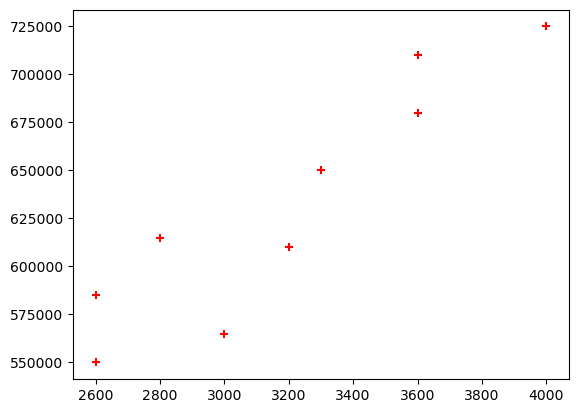

In [61]:
import matplotlib.pyplot as plt
plt.scatter(df.area,df.price,color = "red",marker="+")

In [55]:
print(model.feature_names_in_)

['area' 'chennai' 'trichy']


In [69]:
model.score(x,y)#accuracy

0.9720756135525599